In [97]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
filepath_city_data = "city_data.csv"
filepath_ride_data = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(filepath_city_data)
ride_df = pd.read_csv(filepath_ride_data)

# Combine the data into a single dataset
df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


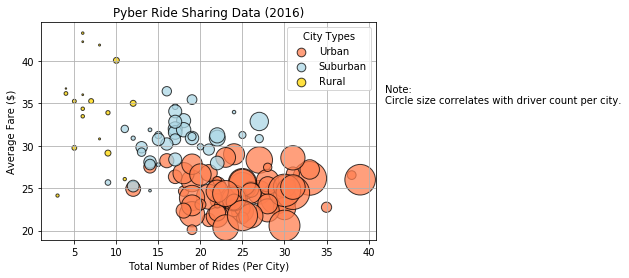

In [98]:
# Obtain the coordinates for each of the three city types
urban = df[(df["type"] == "Urban")]
suburban = df[(df["type"] == "Suburban")]
rural = df[(df["type"] == "Rural")]

# X
urban_city_rides = urban.groupby("city")["ride_id"].count()
suburban_city_rides = suburban.groupby("city")["ride_id"].count()
rural_city_rides = rural.groupby("city")["ride_id"].count()

# Y
urban_city_average = urban.groupby("city")["fare"].mean()
suburban_city_average = suburban.groupby("city")["fare"].mean()
rural_city_average = rural.groupby("city")["fare"].mean()

# S
urban_city_drivers = urban.groupby("city")["driver_count"].sum()
suburban_city_drivers = suburban.groupby("city")["driver_count"].sum()
rural_city_drivers = rural.groupby("city")["driver_count"].sum()

# Build the scatter plots for each city types
plt.scatter(urban_city_rides, urban_city_average, s = urban_city_drivers * 0.5 , c = "coral" , linewidths = 1, edgecolor = "black", alpha = 0.75, label = "Urban")
plt.scatter(suburban_city_rides, suburban_city_average, s = suburban_city_drivers * 0.5, c = "lightblue" , linewidths = 1, edgecolor = "black", alpha = 0.75, label = "Suburban")
plt.scatter(rural_city_rides, rural_city_average, s = rural_city_drivers * 0.5, c = "gold" , linewidths = 1, edgecolor = "black", alpha = 0.75, label = "Rural")
plt.grid()

# Labels
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Legend 
legend = plt.legend(title = "City Types", loc = "upper right") 
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Save Figure
plt.savefig("pyber_ride_sharing_data.png")

# Show plot
plt.show()

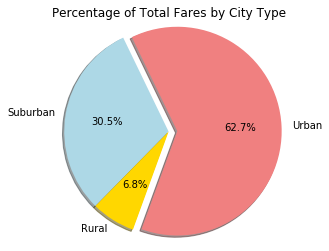

In [99]:
# Percentage of Total Fares by City Type
urban_total_revenue = urban["fare"].sum()
suburban_total_revenue = suburban["fare"].sum()
rural_total_revenue = rural["fare"].sum()
pie_chart_fares = [urban_total_revenue, suburban_total_revenue, rural_total_revenue]
explode = [0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightblue", "gold"]

# Build Pie Chart
plt.pie(pie_chart_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 250, radius = 1.2)
plt.title("Percentage of Total Fares by City Type")

# Save Figure
plt.savefig("percentage_of_total_fares_types.png")

# Show Figure
plt.show()

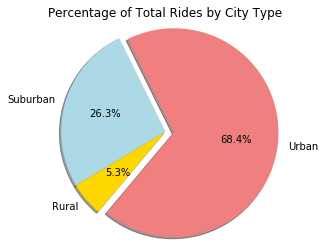

In [100]:
# Percentage of Total Rides by City Type
urban_total_rides = urban["fare"].count()
suburban_total_rides = suburban["fare"].count()
rural_total_rides = rural["fare"].count()
pie_chart_rides = [urban_total_rides, suburban_total_rides, rural_total_rides]
explode = [0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightblue", "gold"]

# Build Pie Chart
plt.pie(pie_chart_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 230, radius = 1.2)
plt.title("Percentage of Total Rides by City Type")

# Save Figure
plt.savefig("percentage_of_total_rides_types.png")

# Show Figure
plt.show()

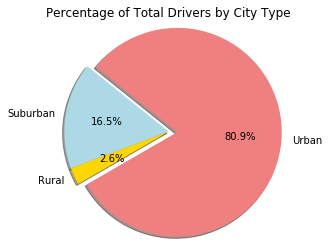

In [102]:
# Percentage of Total Drivers by City Type
urban_2 = city_df[(city_df["type"] == "Urban")]
suburban_2 = city_df[(city_df["type"] == "Suburban")]
rural_2 = city_df[(city_df["type"] == "Rural")]

urban_total_drivers = urban_2["driver_count"].sum()
suburban_total_drivers = suburban_2["driver_count"].sum()
rural_total_drivers = rural_2["driver_count"].sum()
pie_chart_drivers = [urban_total_drivers, suburban_total_drivers, rural_total_drivers]
explode = [0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightblue", "gold"]

# Build Pie Chart
plt.pie(pie_chart_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 210, radius = 1.2)
plt.title("Percentage of Total Drivers by City Type")

# Save Figure
plt.savefig("percentage_of_total_drivers_types.png")

# Show Figure
plt.show()